In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Breast_Cancer.csv',encoding='latin1') 

In [4]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


##  Data Overview

In [5]:
print("Shape of data:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Shape of data: (4024, 16)

Data Types:
 Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

Missing values:
 Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival

In [6]:
df['Race'].value_counts()

Race
White    3413
Other     320
Black     291
Name: count, dtype: int64

In [7]:
df['Marital Status'].value_counts()

Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64

In [8]:
df['Marital Status']=df['Marital Status'].replace('Divorced','Separated')
df['Marital Status'].value_counts()

Marital Status
Married      2643
Single        615
Separated     531
Widowed       235
Name: count, dtype: int64

In [9]:
df['differentiate'].value_counts()

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

In [10]:
df['A Stage'].value_counts()

A Stage
Regional    3932
Distant       92
Name: count, dtype: int64

In [11]:
df['Estrogen Status'].value_counts()

Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64

In [12]:
df['Progesterone Status'].value_counts()

Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64

In [13]:
df['Status'].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

# Exploratory Data Analysis

## Target Variable Analysis

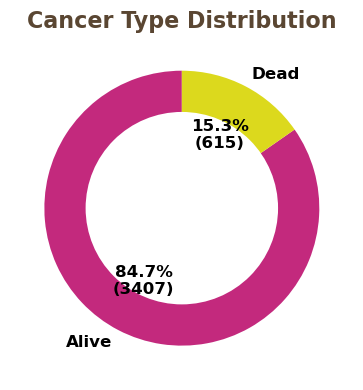

In [14]:
plt.figure(figsize=(4,4))
nude_colors = ["#c3297d", "#dcd91d"]  

counts = df['Status'].value_counts()
labels = counts.index
sizes = counts.values

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*sum(sizes))})",
    colors=nude_colors,
    startangle=90,
    textprops=dict(color="black", fontsize=12, fontweight="bold")
)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Cancer Type Distribution", fontsize=16, fontweight="bold", color="#5a4632")
plt.tight_layout()
plt.show()


### Interpretation :
 The majority of patients in the dataset are alive, suggesting a relatively high survival rate.The proportion of deceased patients is comparatively small, indicating that the dataset may be **skewed toward survivors**.

## Numeric Feature Distribution

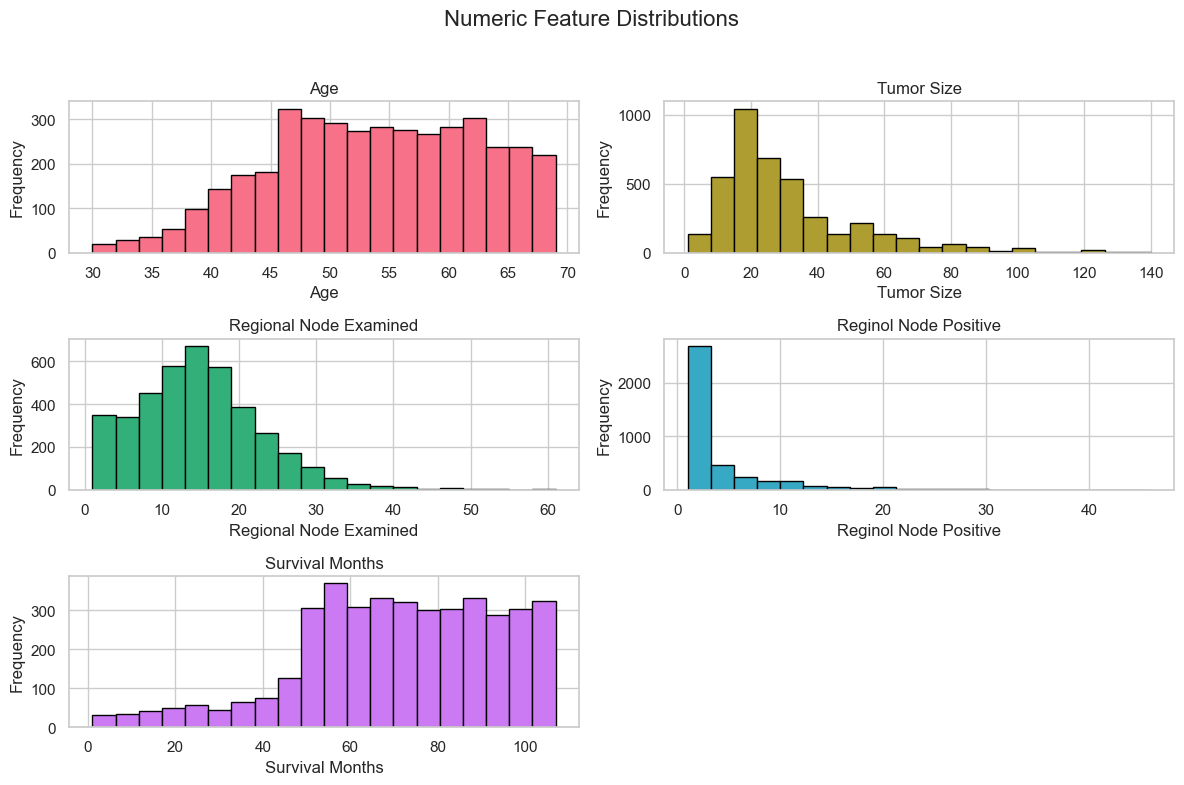

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(num_cols))
fig, axes = plt.subplots(len(num_cols) // 2 + len(num_cols) % 2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=20, color=colors[i], edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Interpretation
1. Age :
The distribution is roughly bell-shaped, centered between 50–60 years. Very few patients are younger than 35 or older than 68. This suggests breast cancer in this dataset is more common in middle-aged and older women.

2. Tumor Size :
The distribution is right-skewed, meaning most patients have small tumors (under 40 mm), but there are some cases with very large tumors (over 100 mm). A long tail indicates a few extreme cases with exceptionally large tumor sizes.

3. Regional Node Examined :
Peaks around 10–20 nodes examined.Most patients had fewer than 25 nodes examined. This might reflect surgical or diagnostic practice standards where a certain range of nodes is typically examined.

4. Reginol Node Positive :
Highly right-skewed.The majority of patients had 1–5 positive nodes. A small number had very high positive node counts (>30), which could indicate more advanced cancer.

5. Survival Months :
Many patients have survival periods clustered between 50–110 months. Noticeable spike around the upper range could be due to censoring (patients still alive at last follow-up). Very few patients survived less than 20 months.

### Overall Observations
Numeric features here show clear skewness in tumor-related variables (Tumor Size, Reginol Node Positive), while demographic variables like Age are more evenly distributed.
The skewness suggests that statistical transformations (e.g., log-scaling) could help modeling.
The survival distribution suggests a large portion of the cohort is long-term survivors.

## Categorical Feature Distribution

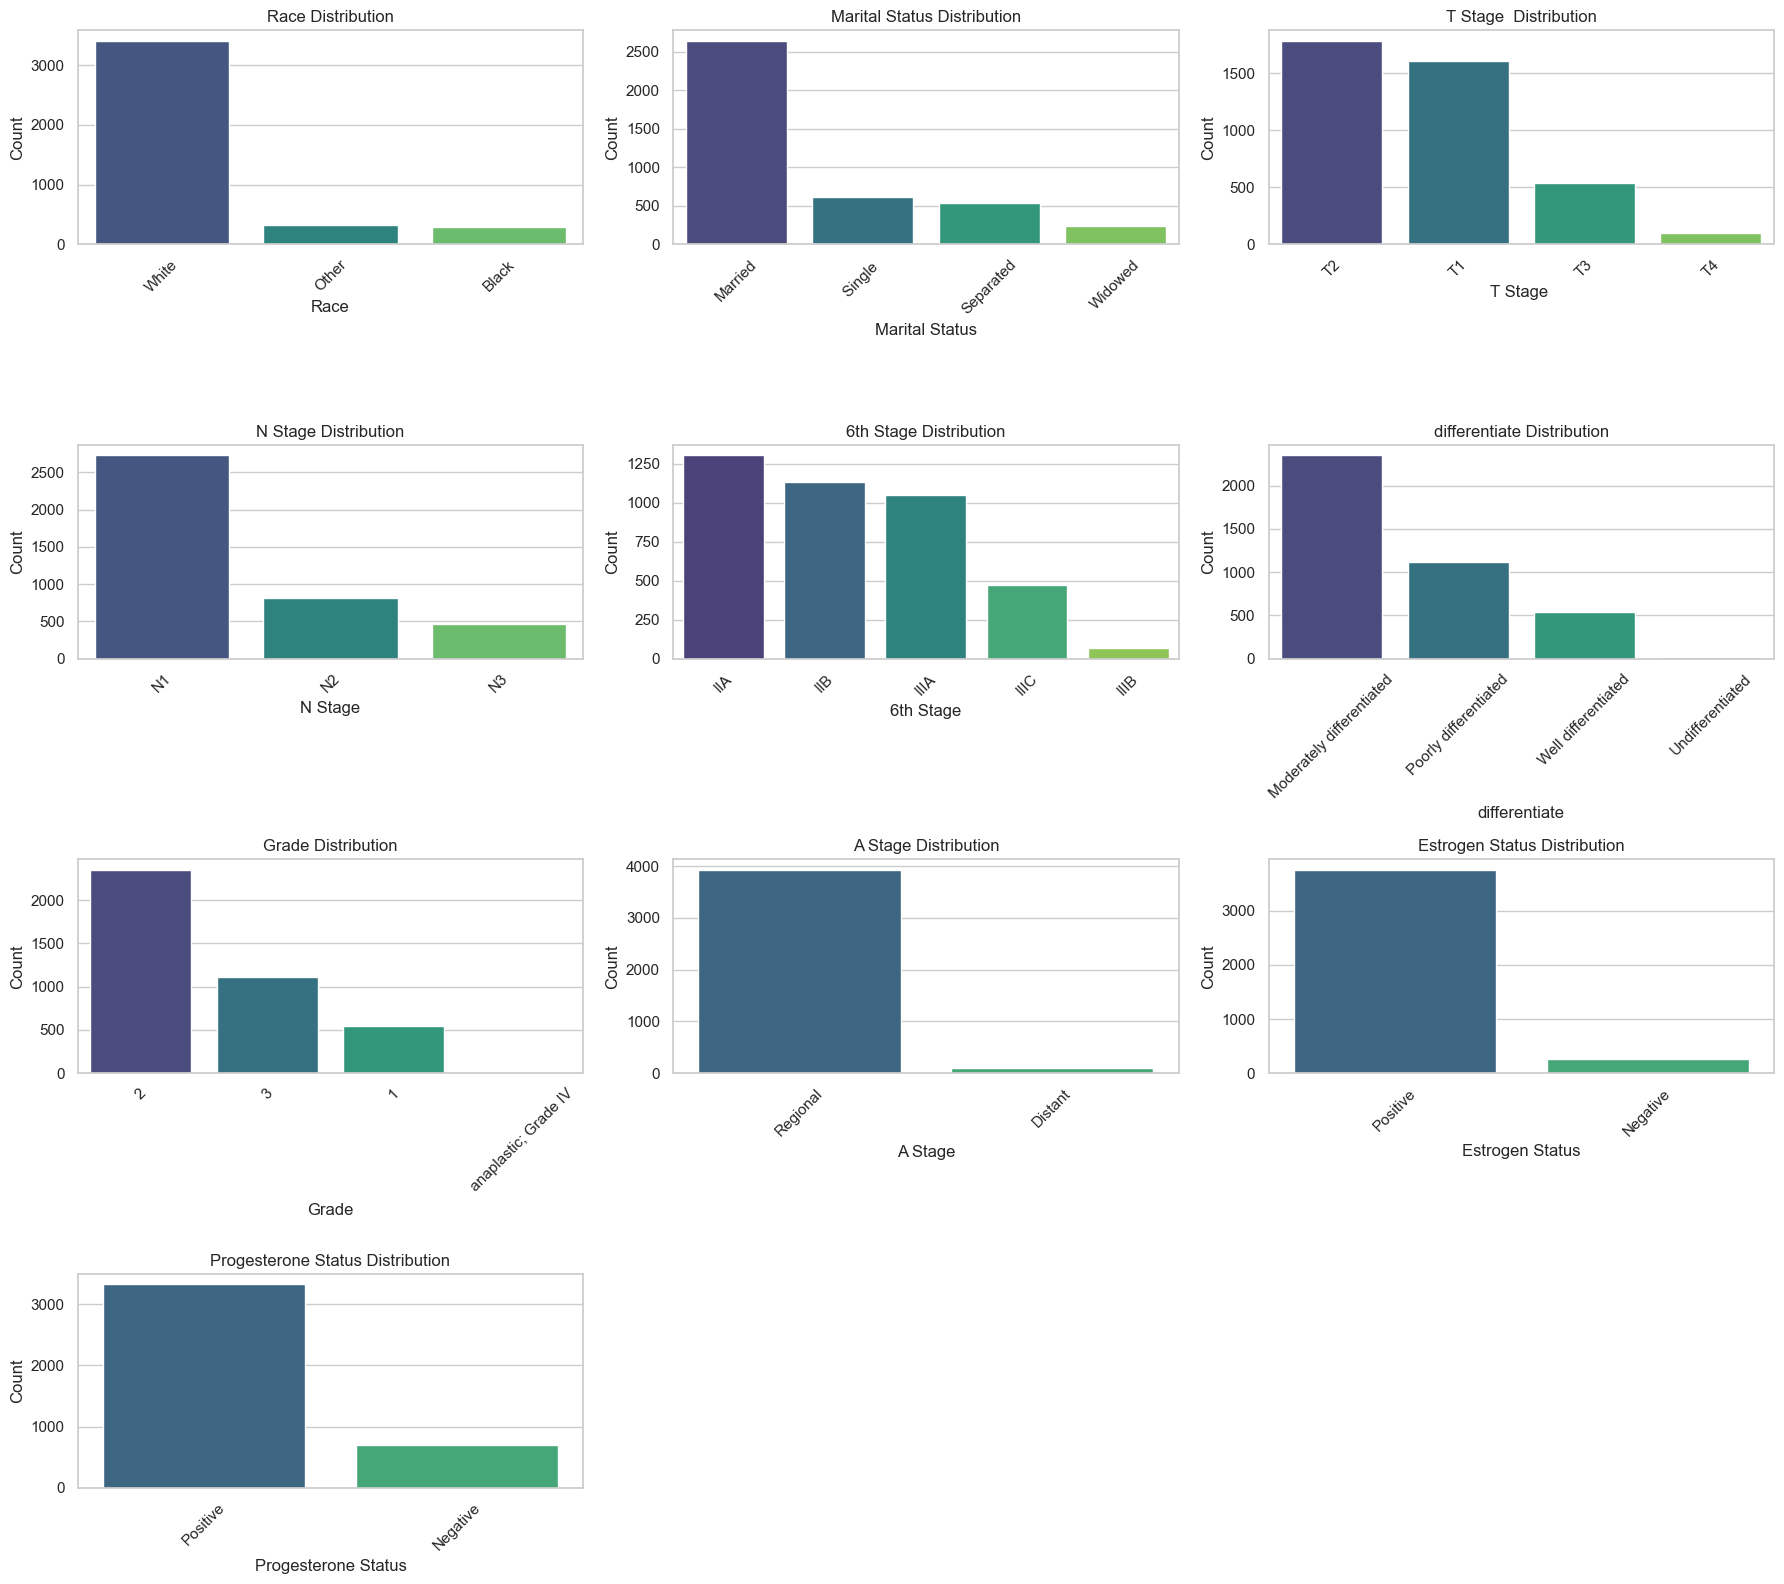

In [16]:
categorical_cols = [
    'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
    'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status'
]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df,
        x=col,
        ax=axes[i],
        palette='viridis',
        order=df[col].value_counts().index
    )
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Interpretation
1. Race Distribution :
White patients make up the overwhelming majority.Black and Other races are much smaller groups.This imbalance means results may be biased toward trends in White patients.

2. Marital Status Distribution :
Most patients are Married, followed by Single and Divorced.Widowed and Separated groups are relatively rare.Marital status can be a proxy for social support, which may influence treatment outcomes.

3. T Stage Distribution (Tumor Size Classification) :
T2 and T1 are the most common tumor stages, meaning many tumors are small-to-moderate at diagnosis.T3 and T4 (larger tumors) are less frequent, suggesting fewer late-detected cases.

4. N Stage Distribution (Lymph Node Involvement) :
N1 is by far the most common, showing limited node involvement in most patients.N2 and N3 (more advanced node spread) are progressively less frequent.

5. 6th Stage Distribution (Overall Cancer Stage) :
IIA, IIB, and IIIA dominate, meaning a majority of patients are diagnosed in intermediate stages.Very few cases are IIIB, which is a more advanced stage.

6. Differentiate Distribution (Tumor Differentiation) :
Moderately differentiated tumors are most common, followed by Poorly differentiated.Well differentiated tumors (less aggressive) are rare, and Undifferentiated tumors are extremely rare.

7. Grade Distribution :
Grade 2 tumors dominate, followed by Grade 3 (more aggressive).Grade 1 (least aggressive) is uncommon, and Anaplastic Grade IV is extremely rare.

8. A Stage Distribution (Anatomical Stage) :
Regional spread is overwhelmingly the most common.Distant spread is rare, suggesting few patients have metastasis at diagnosis.

9. Estrogen Status :
Positive estrogen receptor status is very common, meaning many patients may benefit from hormone therapies.Negative estrogen status is rare.

10. Progesterone Status :
Positive progesterone receptor status is dominant.Negative status is much less frequent, similar to estrogen receptor patterns.

### Overall Insights
The dataset is imbalanced in terms of race, hormone receptor status, and stage.
Most patients are diagnosed at intermediate stages (IIA–IIIA) with regional spread and moderate differentiation.
Hormone-positive breast cancers dominate, suggesting that hormone therapy is likely a major treatment pathway.
Late-stage and highly aggressive tumors are comparatively rare.

## Correlation between features

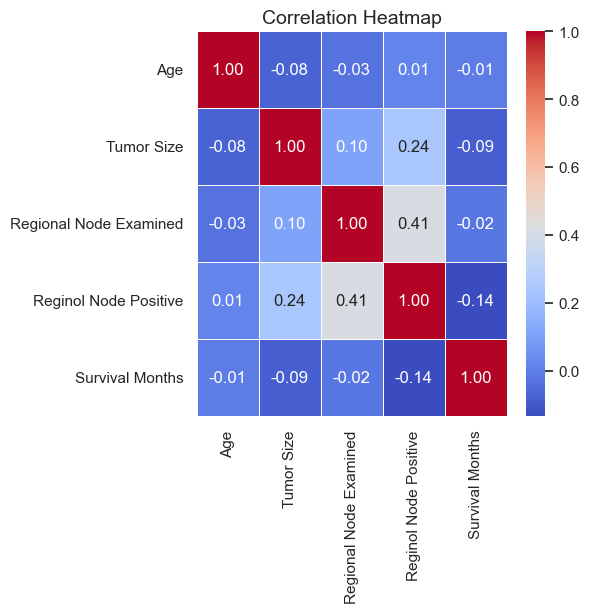

In [17]:
numeric_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 
                'Reginol Node Positive', 'Survival Months']

corr = df[numeric_cols].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### Interpretation
**Age** has almost no correlation with tumor size, lymph node involvement, or survival months → meaning age alone is not a strong predictor in this dataset.

**Tumor Size** shows
Weak positive correlation with Regional Node Examined (0.10) and Reginol Node Positive (0.24) → larger tumors tend to have more lymph nodes examined and more positive nodes.
Weak negative correlation with Survival Months (-0.09) → slightly shorter survival for larger tumors.

**Regional Node** Examined has a moderate positive correlation (0.41) with Reginol Node Positive → as more nodes are examined, more positives are found (logical due to higher detection chance).
Reginol Node Positive has a weak negative correlation (-0.14) with Survival Months → more positive nodes are associated with slightly reduced survival.

Overall correlations are weak to moderate, meaning no single numeric variable is strongly linear with survival in this dataset. More complex (nonlinear) relationships may exist.

## Boxplot for comparing categorical columns  with Status

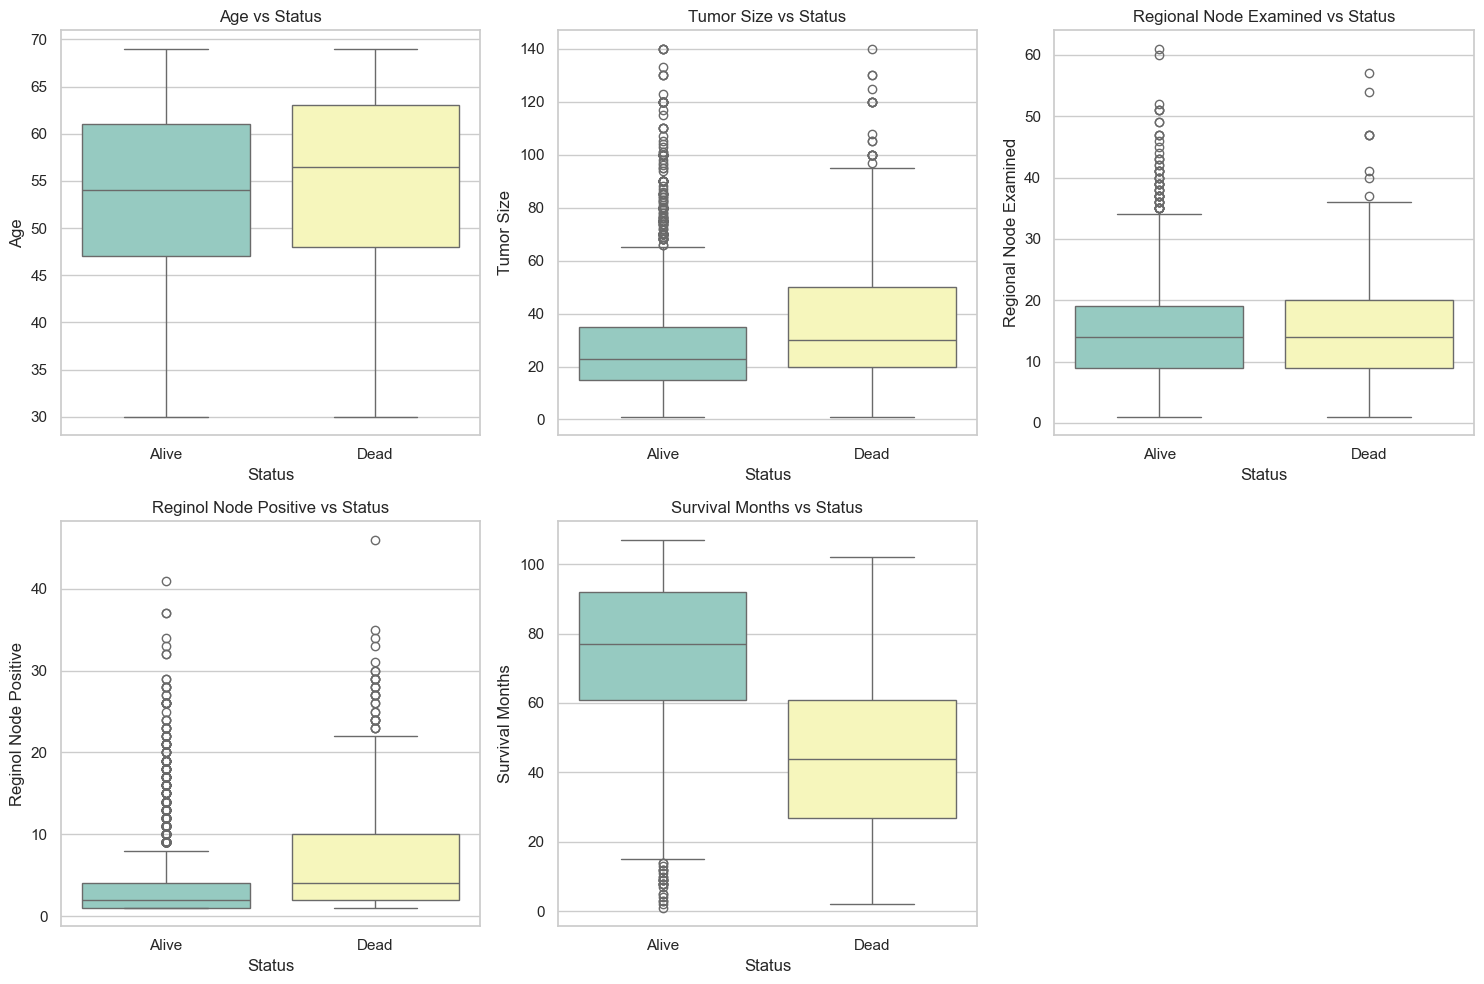

In [18]:
variables = ['Age', 'Tumor Size', 'Regional Node Examined', 
             'Reginol Node Positive', 'Survival Months']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Status', y=var, data=df, palette='Set3')
    plt.title(f"{var} vs Status")

plt.tight_layout()
plt.show()

### Interpretation
1. Age vs Status :
The median age for Alive and Dead patients is fairly similar (mid-50s). Age distribution overlaps a lot, suggesting age alone is not a strong discriminator of survival in this dataset.

2. Tumor Size vs Status :
Dead patients tend to have slightly larger tumors on average. Wider spread in tumor size for Dead patients, with more extreme outliers → larger tumors may be linked to higher mortality.

3. Regional Node Examined vs Status :
Medians are similar, but Dead patients have a slightly higher upper range. Suggests number of examined nodes is more related to diagnostic practices than survival itself.

4. Reginol Node Positive vs Status :
Dead patients generally have more positive nodes. Higher positive lymph node count may indicate more advanced disease and worse prognosis.

5. Survival Months vs Status :
Alive patients have higher survival months (median ~80) compared to Dead patients (~45). Distribution clearly shows survival months as the most directly related to patient status.

## Countplot for comparing categorical columns with Status

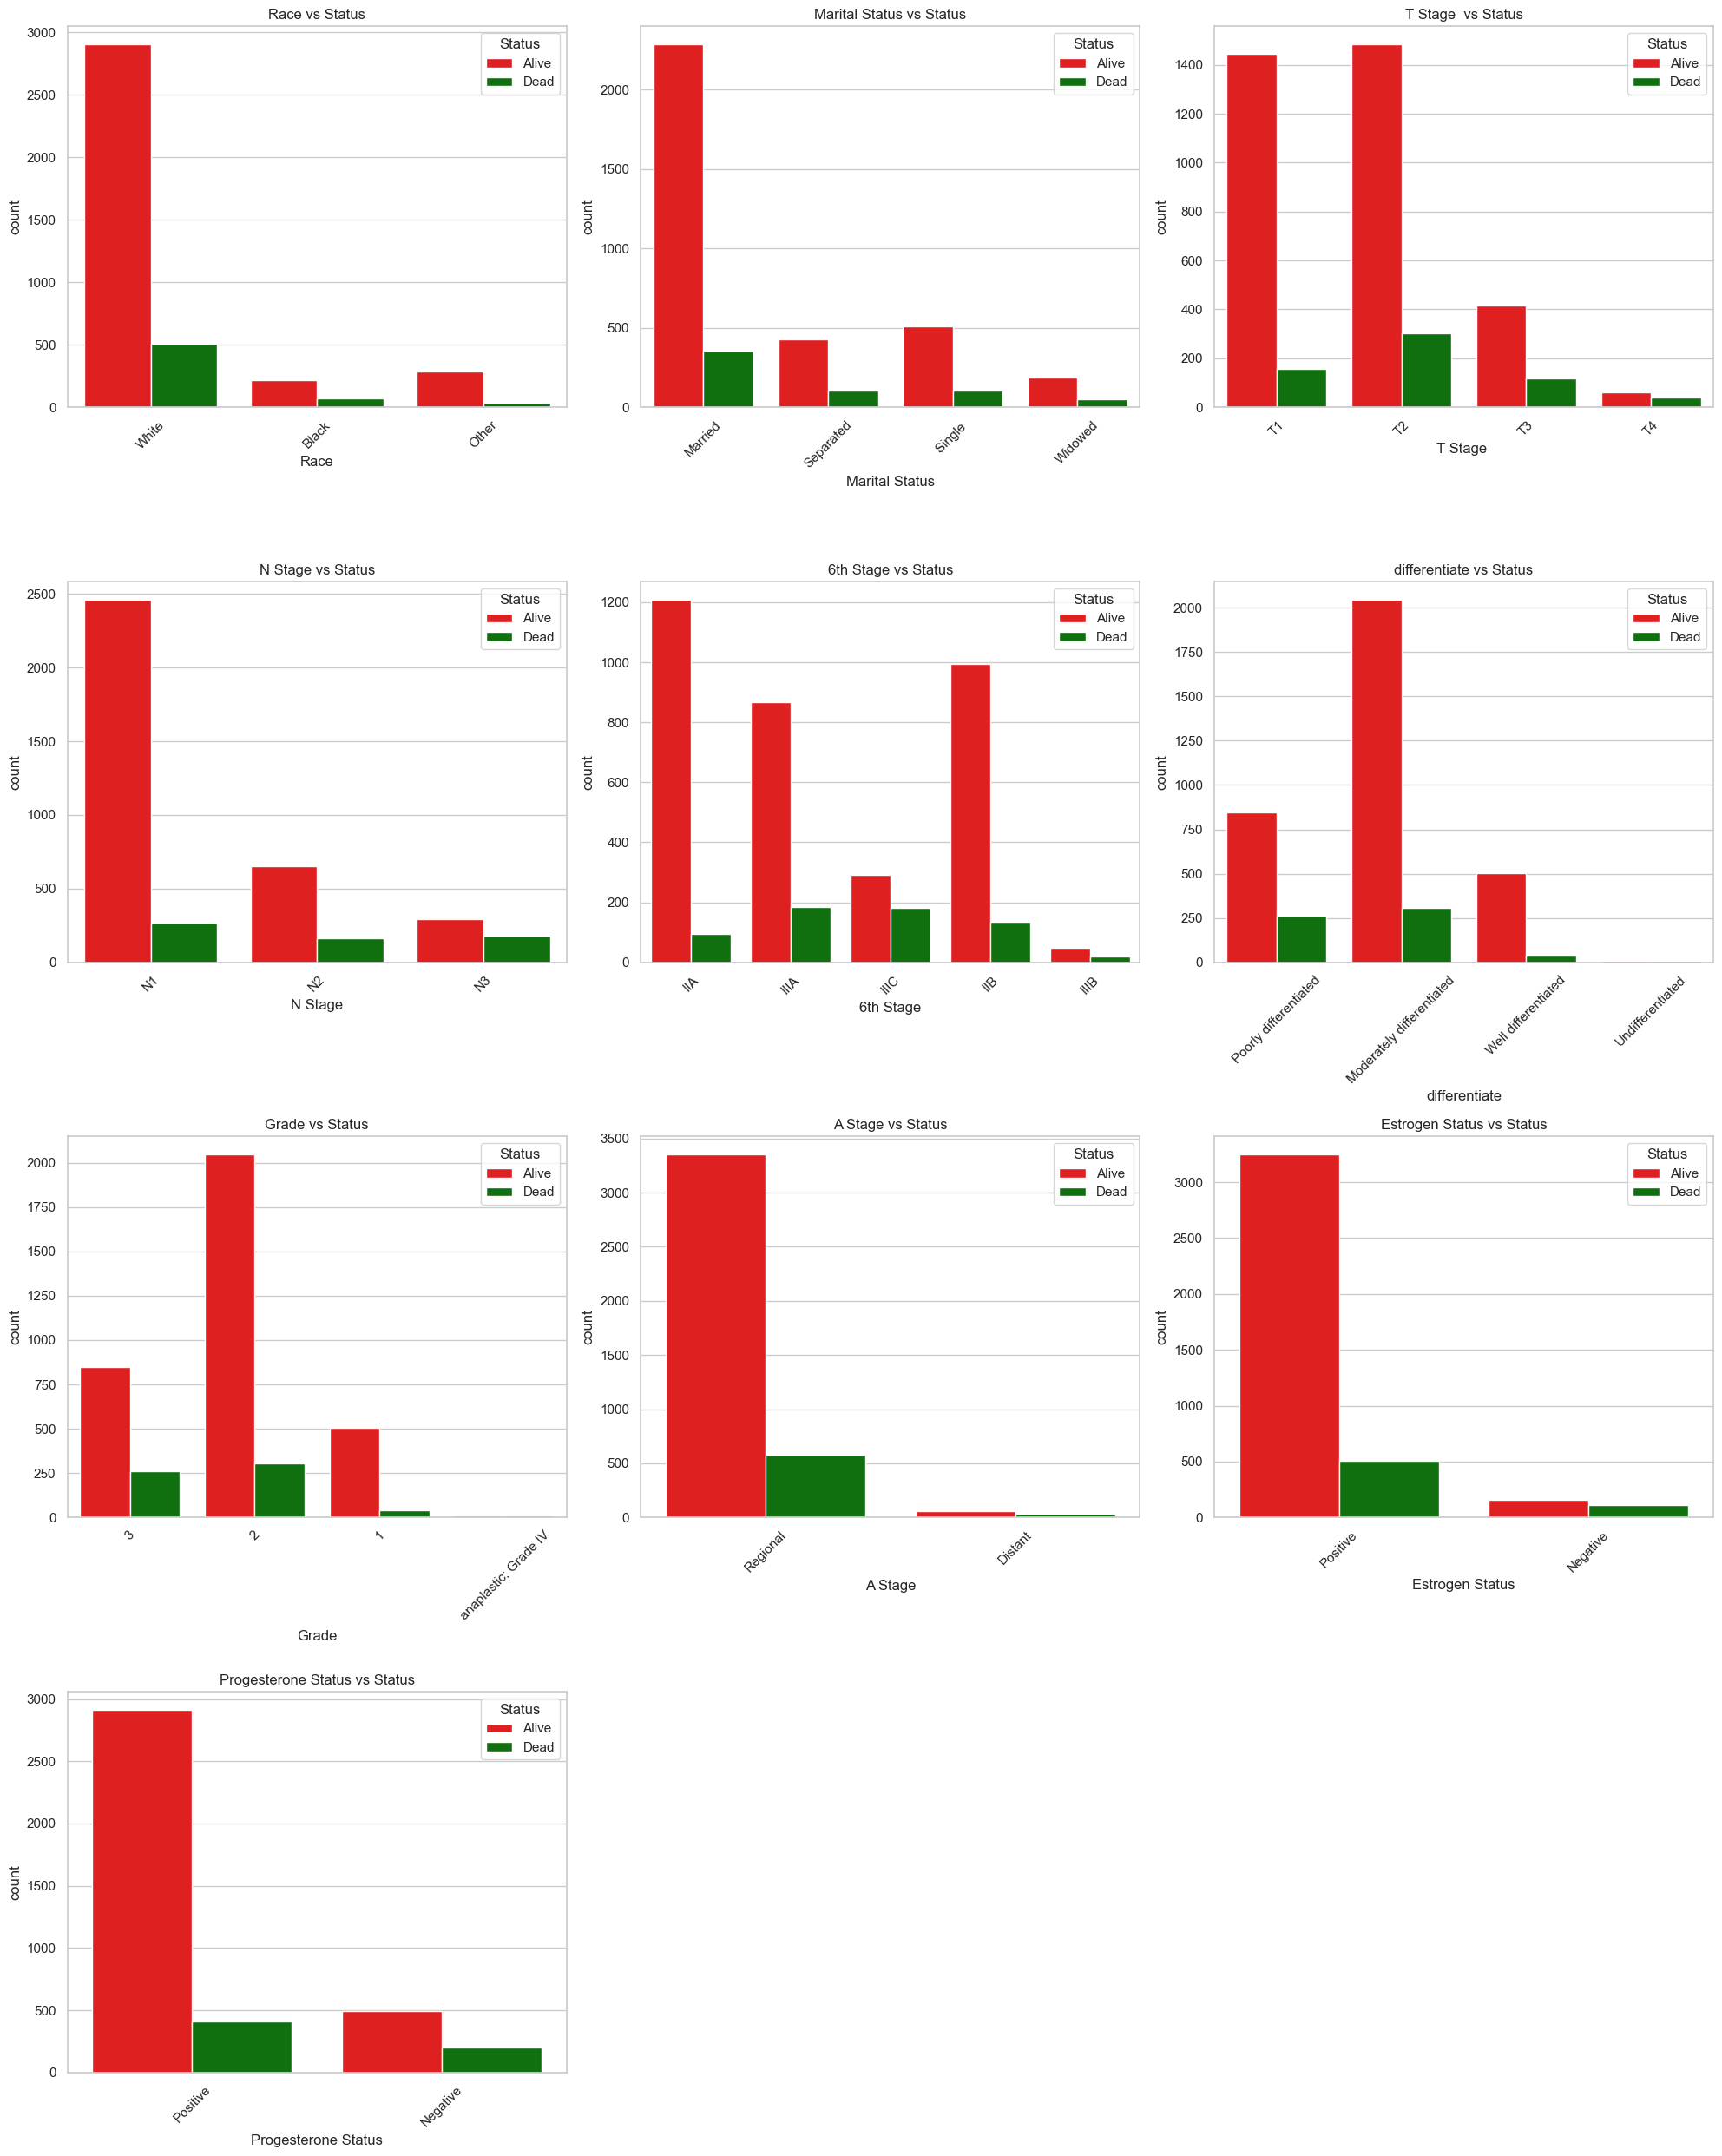

In [19]:
categorical_vars = [
    'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
    'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status'
]

plt.figure(figsize=(20, 25))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=var, hue='Status', palette=['red', 'green'])
    plt.title(f"{var} vs Status")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Interpretation 
1. Race vs Status : 
Most patients are White, followed by Black and Other.Across all races, more patients are Alive than Dead.Proportions of survival seem similar across races.

2. Marital Status vs Status : 
Majority of patients are Married.Married individuals appear to have a slightly higher proportion of survival compared to other marital statuses.Single and Widowed groups have relatively higher death proportions.

3. T Stage vs Status : 
Early T stages (T1, T2) dominate and show higher survival rates. Higher T stages (T3, T4) have proportionally more deaths, indicating tumor size/stage is linked to prognosis.

4. N Stage vs Status : 
N1 is the most common stage, with higher survival counts. N3 shows a greater proportion of deaths compared to N1.

5. 6th Stage vs Status :
Early stages (IIA, IIIA) have more survivors. Advanced stages (IIIB) have higher death rates, consistent with disease progression impact.

6. Differentiate vs Status : 
Moderately differentiated and Poorly differentiated tumors are common. Poor differentiation correlates with worse survival outcomes.

7. Grade vs Status : 
Grade 2 is most frequent and shows higher survival counts. Higher grades correlate with lower survival rates.

8. A Stage vs Status :
Regional stage dominates and has better survival outcomes compared to Distant stage, which shows higher mortality.

9. Estrogen Status vs Status :
Most patients are Estrogen Positive, with higher survival rates. Negative estrogen status correlates with worse survival.

10. Progesterone Status vs Status : 
Similar trend to estrogen: Positive status has higher survival. Negative progesterone status is linked to worse outcomes.

## Feature Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Status']=encoder.fit_transform(df['Status'])
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,0
2,58,White,Separated,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,0


In [21]:
####numeric Features
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('Num of numerical Features:',len(num_features))

Num of numerical Features: 6


In [22]:
##Categorical Features
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num of categorical Features:',len(cat_features))

Num of categorical Features: 10


In [23]:
##Discrete Features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features:',len(discrete_features))

Num of Discrete Features: 1


In [24]:
#cont Features
continuous_features=[feature for feature in num_features if len(df[feature].unique())>25]
print('Num of continuous Features:',len(continuous_features))

Num of continuous Features: 5


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop("Status", axis=1)
y = df["Status"]

# One-hot encode categorical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize before SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE on scaled training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Check class balance
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())


Before SMOTE: {0: 2726, 1: 493}
After SMOTE: {0: 2726, 1: 2726}


# Model Fitting

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score,roc_curve,roc_auc_score

In [27]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "XGboost": XGBClassifier(eval_metric='logloss')
}

for name, model in models.items():
    # Train model on SMOTE data
    model.fit(X_train_res, y_train_res)

    # Predictions
    y_train_pred = model.predict(X_train_res)
    y_test_pred = model.predict(X_test_scaled)  # Scaled test data

    # Probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train_res)[:, 1]
        y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_train_proba = y_train_pred
        y_test_proba = y_test_pred

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_res, y_train_pred)
    model_train_f1 = f1_score(y_train_res, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train_res, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train_res, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train_res, y_train_proba)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba)

    # Print results
    print(f"\n{name}")
    print("Model performance for Training set")
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score:.4f}")
    print("----------------------------------")
    print("Model performance for Test set")
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")



Logistic Regression
Model performance for Training set
- Accuracy: 0.8092
- F1 score: 0.8092
- Precision: 0.8093
- Recall: 0.8092
- Roc Auc Score: 0.8886
----------------------------------
Model performance for Test set
- Accuracy: 0.7938
- F1 score: 0.8159
- Precision: 0.8637

KNN
Model performance for Training set
- Accuracy: 0.9112
- F1 score: 0.9108
- Precision: 0.9197
- Recall: 0.9112
- Roc Auc Score: 0.9864
----------------------------------
Model performance for Test set
- Accuracy: 0.7267
- F1 score: 0.7591
- Precision: 0.8222

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8075
- F1 score: 0.8160
- Precision: 0.8270

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
M

**XGBoost**: highest test accuracy and ROC AUC, worth fine-tuning.  
**Random Forest** : strong test accuracy, can be tuned to reduce overfitting.  
**Adaboost** : balanced train/test, good precision and F1, likely to improve with tuning.  

In [28]:
rf_params = {'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]}
ada_params = {
    'n_estimators': [50, 100, 200, 300],          # Number of weak learners
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 1], # Shrinks the contribution of each classifier
    'algorithm': ['SAMME', 'SAMME.R']             # SAMME.R uses probabilities, SAMME uses class labels
}
xgboost_params={'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 3]}

In [29]:
# Models list for Hyperparameter tuning
randomcv_models = [("RF", RandomForestClassifier(), rf_params),
                   ("ADA",AdaBoostClassifier(),ada_params),
                   ("XGB",XGBClassifier(),xgboost_params)
                  ]

In [30]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_res, y_train_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
---------------- Best Params for ADA -------------------
{'n_estimators': 300, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
---------------- Best Params for XGB -------------------
{'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}


In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=300, min_samples_split=2, min_samples_leaf=1,
        max_features='log2', max_depth=30, bootstrap=False
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=300, learning_rate=1, algorithm='SAMME.R'
    ),
    "XGBoost": XGBClassifier(
        subsample=0.8, scale_pos_weight=1, n_estimators=300,
        max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6
    )
}

for name, model in models.items():
    # Train on SMOTE-balanced data
    model.fit(X_train_res, y_train_res)

    # Predictions
    y_train_pred = model.predict(X_train_res)
    y_test_pred = model.predict(X_test_scaled)

    # Probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train_res)[:, 1]
        y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_train_proba = y_train_pred
        y_test_proba = y_test_pred

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_res, y_train_pred)
    model_train_f1 = f1_score(y_train_res, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train_res, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train_res, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train_res, y_train_proba)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba)

    # Print results
    print(f"\n{name}")
    print("Model performance for Training set")
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score:.4f}")
    print("----------------------------------")
    print("Model performance for Test set")
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- Roc Auc Score: {model_test_rocauc_score:.4f}")
    print("="*40)



Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8733
- F1 score: 0.8711
- Precision: 0.8692
- Recall: 0.8733
- Roc Auc Score: 0.8254

AdaBoost
Model performance for Training set
- Accuracy: 0.9123
- F1 score: 0.9123
- Precision: 0.9129
- Recall: 0.9123
- Roc Auc Score: 0.9708
----------------------------------
Model performance for Test set
- Accuracy: 0.8646
- F1 score: 0.8681
- Precision: 0.8726
- Recall: 0.8646
- Roc Auc Score: 0.8477

XGBoost
Model performance for Training set
- Accuracy: 0.9815
- F1 score: 0.9815
- Precision: 0.9819
- Recall: 0.9815
- Roc Auc Score: 0.9992
----------------------------------
Model performance for Test set
- Accuracy: 0.8795
- F1 score: 0.8738
- Precision: 0.8708
- Recall: 0.8795
- Roc Auc Score: 0.8396


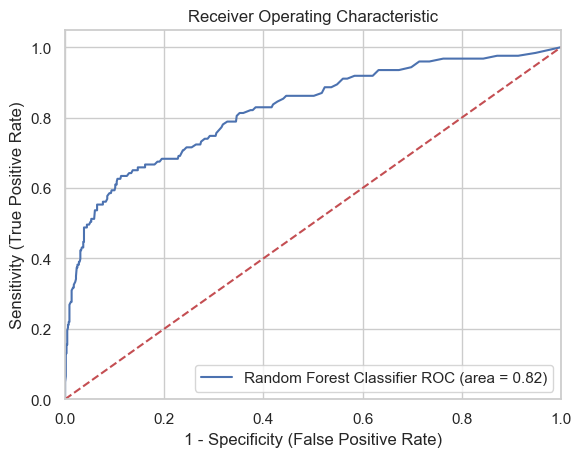

In [32]:
plt.figure()

# Models for ROC plotting
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(
            n_estimators=300, min_samples_split=2, min_samples_leaf=1,
            max_features='log2', max_depth=30, bootstrap=False, random_state=42
        )
    }
]

# Loop through models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train_res, y_train_res)  # Train on SMOTE-balanced data
    
    # Get predicted probabilities for positive class
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute FPR, TPR, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    
    # Calculate AUC dynamically
    auc_score = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc_score))

# Plot reference line
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

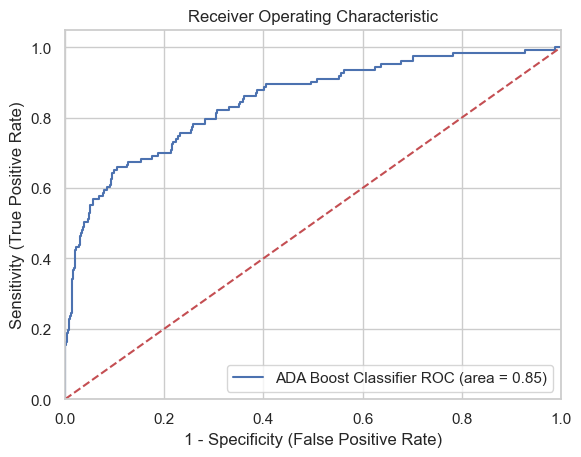

In [33]:
plt.figure()

# Model setup
auc_models = [
    {
        'label': 'ADA Boost Classifier',
        'model': AdaBoostClassifier(
            n_estimators=300,
            learning_rate=1,
            algorithm='SAMME.R',
            random_state=42
        )
    }
]

# Loop through models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train_res, y_train_res)  # Train on SMOTE-balanced data
    
    # Predict probabilities
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute FPR & TPR
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    
    # Calculate AUC dynamically
    auc_score = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc_score))

# Reference line
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()


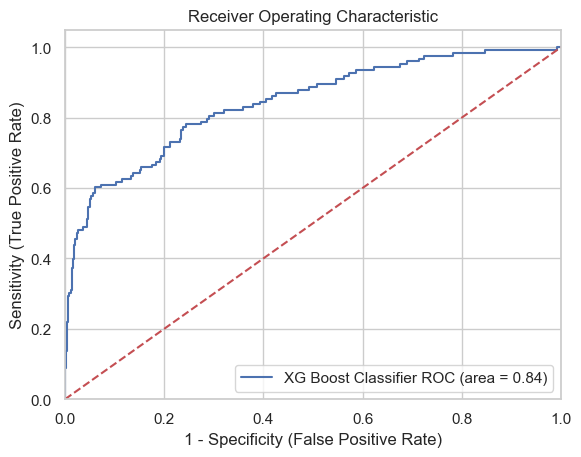

In [34]:
plt.figure()

# Model setup
auc_models = [
    {
        'label': 'XG Boost Classifier',
        'model': XGBClassifier(
            subsample=0.8,
            scale_pos_weight=1,
            n_estimators=300,
            max_depth=7,
            learning_rate=0.05,
            gamma=0.2,
            colsample_bytree=0.6,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )
    }
]

# Loop through models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train_res, y_train_res)  # Train on SMOTE-balanced data
    
    # Predict probabilities
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute FPR & TPR
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    
    # Calculate AUC dynamically
    auc_score = roc_auc_score(y_test, y_test_proba)
    
    # Plot ROC
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc_score))

# Reference line
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("xgb_auc.png")
plt.show()


## Conclusion 

After hyperparameter tuning of Random Forest, AdaBoost, and XGBoost, all three models demonstrated strong predictive 
performance on the test set. 
**XGBoost** achieved 0the highest accuracy (87.95%) with solid precision and recall, indicating strong overall classification ability.
**AdaBoost**, while slightly behind in accuracy (86.46%), achieved the highest ROC AUC (0.8477), suggesting better capability in distinguishing between classes . **Random Forest**, despite achieving perfect training performance, showed signs of overfitting and slightly lower ROC AUC compared to the other tuned models.

Overall,**XGBoost is recommended when accuracy is the primary objective, whereas AdaBoost is preferable when class separation and ranking ability are critical. Random Forest may require additional regularization to match the balance of the other two models.**